<a href="https://colab.research.google.com/github/Neumi/colab-ml-reverse-captcha/blob/master/captch_ml_solver_all_chars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install claptcha
!pip3 install image_slicer

    100% |████████████████████████████████| 92kB 4.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/9b/d5/17/dd822b462a190ec86ad9fd43b455627a2265bb2dfa58af3841
Successfully built image-slicer


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
!pip install git+https://github.com/fastai/fastai.git
!curl -LJO https://raw.githubusercontent.com/lepture/captcha/master/captcha/data/DroidSansMono.ttf

In [0]:
#!/bin/bash
# !mkdir numbers
# !mkdir numbers/0
# !mkdir numbers/1
# !mkdir numbers/2
# !mkdir numbers/3
# !mkdir numbers/4
# !mkdir numbers/5
# !mkdir numbers/6
# !mkdir numbers/7
# !mkdir numbers/8
# !mkdir numbers/9
!mkdir captchas
!mkdir images
!mkdir captchas/fragments

In [0]:
!rm captchas/*
!rm images/*

rm: cannot remove 'captchas/fragments': Is a directory


In [0]:
from claptcha import Claptcha
from random import choice
from string import ascii_uppercase
from string import ascii_lowercase
from string import digits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import os
import sys
import urllib.request
from fastai.vision import *
from fastai.imports import *
from sklearn.utils import shuffle
import imageio
from PIL import Image

print("done!")

done!


In [0]:
captchasDir = 'captchas/'
imgXorigin = 200
imgYorigin = 80
offset = 15
imgX = imgXorigin - (2 * offset)
imgY = imgYorigin
captchaLength = 5
captchaAmount = 10000

In [0]:

def generateRandString(length):
    return ''.join(choice(ascii_uppercase + digits + ascii_lowercase) for i in range(length))
    # return ''.join(choice(ascii_uppercase) for i in range(length))
    # return ''.join(choice(digits) for i in range(length))


def generateCaptcha(input):
    c = Claptcha(str(input), "DroidSansMono.ttf")
    text, image = c.image
    text, bytes = c.bytes
    text, file = c.write('captchas/' + str(input) + '.png')
    return


def generateCaptchaFamily(amount, length):
    i = 0
    print('generating ' + str(amount) + ' test files ...')
    while i < amount:
        i += 1
        print(str, end='\r')
        print(str(round(i / amount * 100, 1)) + ' % complete ', end='')        
        randString = generateRandString(length)
        generateCaptcha(randString)


def generateTestFiles():
    i = 0
    amountFiles = 100
    while i < amountFiles:
        i += 1
        randString = generateRandString(captchaLength)
        try:
            generateCaptcha(randString)
            print(str(i) + '/' + str(amountFiles) + ' files generated')
            
        except:
            print('error while generating captcha')


def crop(image_path, coords, img_name):
    image_obj = Image.open(image_path)
    cropped_image = image_obj.crop(coords)
    cropped_image.save(img_name)
    # cropped_image.show()


def extracktNumbersFromImage(image, number):
    # digits = [int(d) for d in str(number)]
    digits = [str(d) for d in str(number)]
    crop(image, (offset, 0, imgXorigin - offset, imgYorigin), 'test_img.png')

    for (key, digit) in enumerate(digits):
        startX = (imgX / captchaLength) * key
        cutoffX = (imgX / captchaLength) * (key + 1)
        savePath = './numbers/' + str(digit) + '/'
        savePath = './images/'
        path, dirs, files = next(os.walk(savePath))
        file_count = len(files)
        crop('test_img.png', (startX, 0, cutoffX, imgY), savePath + '/' + str(digit) + '_' + str(file_count + 10000) + '.png')


def generateNumbers():
    path, dirs, files = next(os.walk(captchasDir))
    fileAmount = len(files)
    print('\r\ngenerating ' + str(fileAmount * captchaLength) + ' unique char images...')
    counter = 0
    for file in files:
        numberString = str(file[:captchaLength])
        filePath = str(captchasDir + file.format())

        if not file.startswith('.'):
          counter += 1
          print(str, end='\r')
          print(str(round(counter / fileAmount * 100, 1)) + '% complete ', end='') 
          
          # print(numberString)
          # print(filePath)

          extracktNumbersFromImage(filePath, numberString)

                       

def getStarted():
    # 10000 test files work perfectly fine
    # 1000 is works barely with some errors
    print("size of training batch is " + str(captchaAmount * captchaLength))
    generateCaptchaFamily(captchaAmount, captchaLength)
    generateNumbers()

# generateNumbers()
getStarted()

size of training batch is 50000
generating 10000 test files ...
100.0 % complete 
generating 50000 unique char images...
100.0% complete 

In [0]:
# !rm ./images/*

!ls ./captchas | wc -l


10001


In [0]:
!ls ./images | wc -l

! ls ./images/ | head -10

50000
0_10037.png
0_10044.png
0_10123.png
0_10149.png
0_10165.png
0_10422.png
0_10458.png
0_10465.png
0_10557.png
0_10584.png


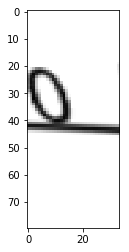

In [0]:
plt.imshow(imageio.imread("./images/0_10037.png"))
plt.show()

In [0]:
fnames = get_image_files("./images")
pat = r'/([^/]+)_\d+.png$'
tfms = get_transforms(do_flip=False)

In [0]:
data = ImageDataBunch.from_name_re("./images", fnames, pat, ds_tfms=tfms)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (40000 items)
x: ImageList
Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34)
y: CategoryList
J,F,f,m,N
Path: images;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34)
y: CategoryList
M,t,1,Z,C
Path: images;

Test: None

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
data.classes

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:00, 46883991.33it/s]


In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.627396,1.216370,0.367500,01:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


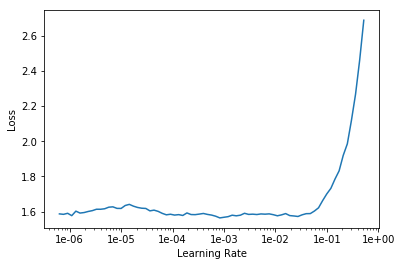

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,  1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,3.813834,8.198453,0.193000,00:59
1,0.282998,3.186723,0.041100,01:01


In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,  1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.239338,4.088696,0.035000,01:01
1,0.212662,17.001673,0.037100,00:59
2,0.193749,28.380878,0.043400,01:00


In [0]:
interp=ClassificationInterpretation.from_learner(learn)

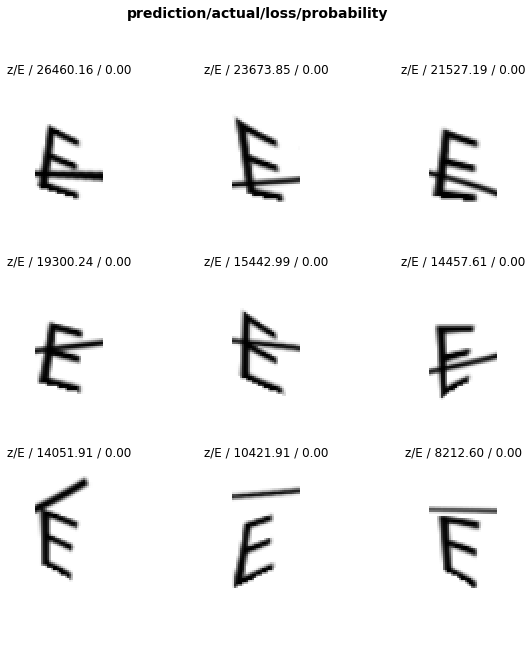

In [0]:
interp.plot_top_losses(9, figsize=(10, 10))

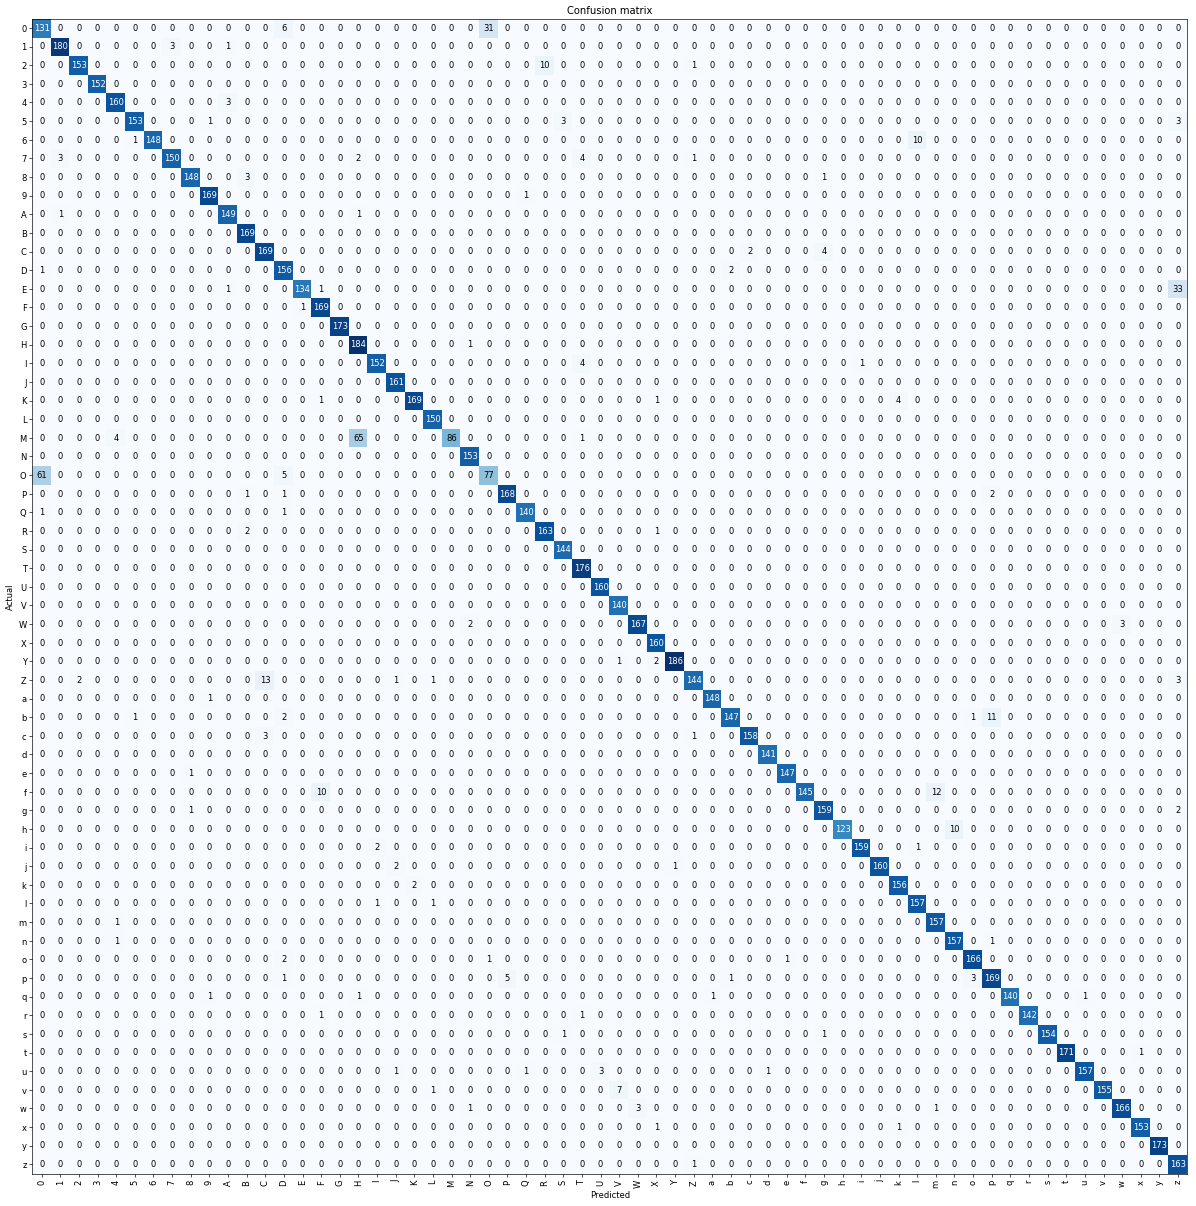

In [0]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [0]:
### test captchas
#!rm captchas/*
#!mkdir captchas/fragments
# !rm captchas/fragments/*


captchasDir = 'captchas/'
imgXorigin = 200
imgYorigin = 80
offset = 15
imgX = imgXorigin - (2 * offset)
imgY = imgYorigin
captchaLength = 5


def crop(image_path, coords, img_name):
    image_obj = Image.open(image_path)
    cropped_image = image_obj.crop(coords)
    cropped_image.save(img_name)
    # cropped_image.show()


def extracktFragmentsFromImage(image):
    crop(image, (offset, 0, imgXorigin - offset, imgYorigin), 'test_img.png')
    for element in range(5):
        startX = (imgX / captchaLength) * element
        cutoffX = (imgX / captchaLength) * (element + 1)
        savePath = './captchas/fragments/'
        path, dirs, files = next(os.walk(savePath))
        file_count = len(files)
        crop('test_img.png', (startX, 0, cutoffX, imgY), savePath + 'img_' + str(element) + '.png')


def decryptFragments():
    for file in sorted(os.listdir("./captchas/fragments/")):
      preds=learn.predict(open_image("./captchas/fragments/" + file))
      print(preds[0])
      
      
def decryptCaptcha(filepath):
  extracktFragmentsFromImage(filepath)
  decryptFragments()
  



# decrypt captcha from URL
urllib.request.urlretrieve("http://inprocess.xyz/captchas/charsDigits/5561482588145406072.png", "test_file.png")
decryptCaptcha('./test_file.png')
print(learn.save('model', True))



# some test files are on https://inprocess.xyz/captchas


c
I
u
p
k
images/models/model.pth


In [0]:
! cp ./images/models/model.pth model.pth
